In [345]:
def get_filename(graph_type, closure_method, experiment_type, value, ):
    if experiment_type == 'threshold':
        value = "{:.1f}".format(value)
    if closure_method == 'triadic':
        closure_method = 'max'

    filename = f'{graph_type}_model{closure_method}_{experiment_type}{value}.pkl'
    
    dirnames = ["e2_communitysbm", "e1_v2_hyperparam", "e1_v3_hyperparam", "e1_hyperparam"]
    
    for dirname in dirnames:
        if filename in os.listdir(dirname):
            return os.path.join(dirname, filename)
    raise ValueError(f'can\'t find {filename} in any of the directories specified')
    

def filter_df(df, filter_d):
    for k, v in filter_d.items():
        df = df[df[k] == v]
    return df

In [321]:
# # Look at what's in the directory
# foo = os.listdir("e1_v2_hyperparam")
# sorted(foo)

Constants

In [410]:
graph_types = ["gnp", "gnpmini", "smb", "sbm_2seed_forked", "sbm_1seed"]
closure_methods= ['pop', 'static', 'random', 'triadic', ]
experiment_types = ['closure', 'threshold']
threshold_vals = np.arange(0.1, 1, 0.1)
# closure_vals = [1, 5, 10, 15, 20, 25]
closure_vals = [1, 5, 10, 25, 50, 75, 100, 250, 500]
experiment_vals_d = {'closure': closure_vals,
                     'threshold':threshold_vals,
                    }
all_data = pd.DataFrame(columns=['max_size_rounds', 'rounds_filled', 'max_sizes', 
                                 'graph_type', 'closure_method', 'experiment_type', 'values'])
colors = [sns.xkcd_rgb['light red'], sns.xkcd_rgb['greenish'], sns.xkcd_rgb['denim'], sns.xkcd_rgb['purpleish blue'], sns.xkcd_rgb['bubblegum']]

In [465]:
pretty_d = {
    'gnp': 'Gnp',
    'sbm': 'SBM',
    'pop': 'Population',
    'max_size_rounds': 'max size round',
    'max_sizes': 'max size',
    'static': 'Static',
    'random': 'Random',
    'triadic': 'Triadic',
}

## Read in data

In [166]:
old_all_data = all_data.copy(deep=True)

In [ ]:
SAVE=False
graph_type = "sbm"
for experiment_type in experiment_types:
    experiment_vals = experiment_vals_d[experiment_type]
    for i, closure_method in enumerate(closure_methods):

        all_max_size_rounds = []
        for experiment_val in experiment_vals:
            
            if len(filter_df(all_data, {
                'graph_type': graph_type,
                'closure_method': closure_method, 
                'experiment_type': experiment_type, 
                'values': experiment_val
            })) > 0: continue
            filename = get_filename(graph_type, closure_method, experiment_type, experiment_val)
            print(filename)
            (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
                open(filename, 'rb')
            )
            all_max_size_rounds.append(max_size_round)

            vals = {
                'max_size_rounds': np.array(max_size_round),
                'rounds_filled': np.array(rounds_filled),
                'max_sizes': np.array([max(x) for x in sizes_round]),
                'graph_type': graph_type,
                'closure_method': closure_method, 
                'experiment_type': experiment_type, 
                'values': experiment_val
            }
            all_data = all_data.append(vals, ignore_index=True)

if SAVE:
    all_data.to_pickle("all_data.pkl")

In [122]:
df = filter_df(all_data, {
    'graph_type': graph_type,
    'closure_method': closure_method, 
    'experiment_type': "closure",})
df.head()

,max_size_rounds,rounds_filled,max_sizes,graph_type,closure_method,experiment_type,values
78,"[16, 67, 100, 22, 8, 48, 0, 24, 58, 49, 18, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.65, 0.9, 0.35, 0.4, 0.9, 0.8, 0.05, 0.95, 0...",gnpmini,max,closure,1
79,"[17, 12, 5, 14, 0, 4, 14, 18, 0, 1, 7, 8, 13, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.85, 0.95, 0.7, 0.9, 0.05, 0.65, 0.8, 0.85, ...",gnpmini,max,closure,5
80,"[1, 4, 3, 7, 11, 6, 4, 7, 5, 8, 6, 5, 0, 3, 15...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.1, 0.35, 0.45, 0.85, 0.9, 0.8, 0.25, 0.85, ...",gnpmini,max,closure,10
81,"[8, 4, 8, 0, 8, 9, 4, 5, 5, 6, 5, 5, 6, 10, 5,...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.7, 0.85, 0.95, 0.05, 1.0, 0.1, 0.8, 0.7, 0....",gnpmini,max,closure,15
82,"[5, 7, 1, 4, 4, 3, 2, 5, 13, 7, 3, 10, 4, 6, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.3, 0.15, 0.1, 0.85, 0.65, 0.1, 0.15, 0.8, 0...",gnpmini,max,closure,20


## Original plotting

/var/folders/cg/yfyy6nkx6jd8r_wqrhbygzkh0000gn/T/ipykernel_60763/1216129429.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [str(x) for x in closure_vals]);


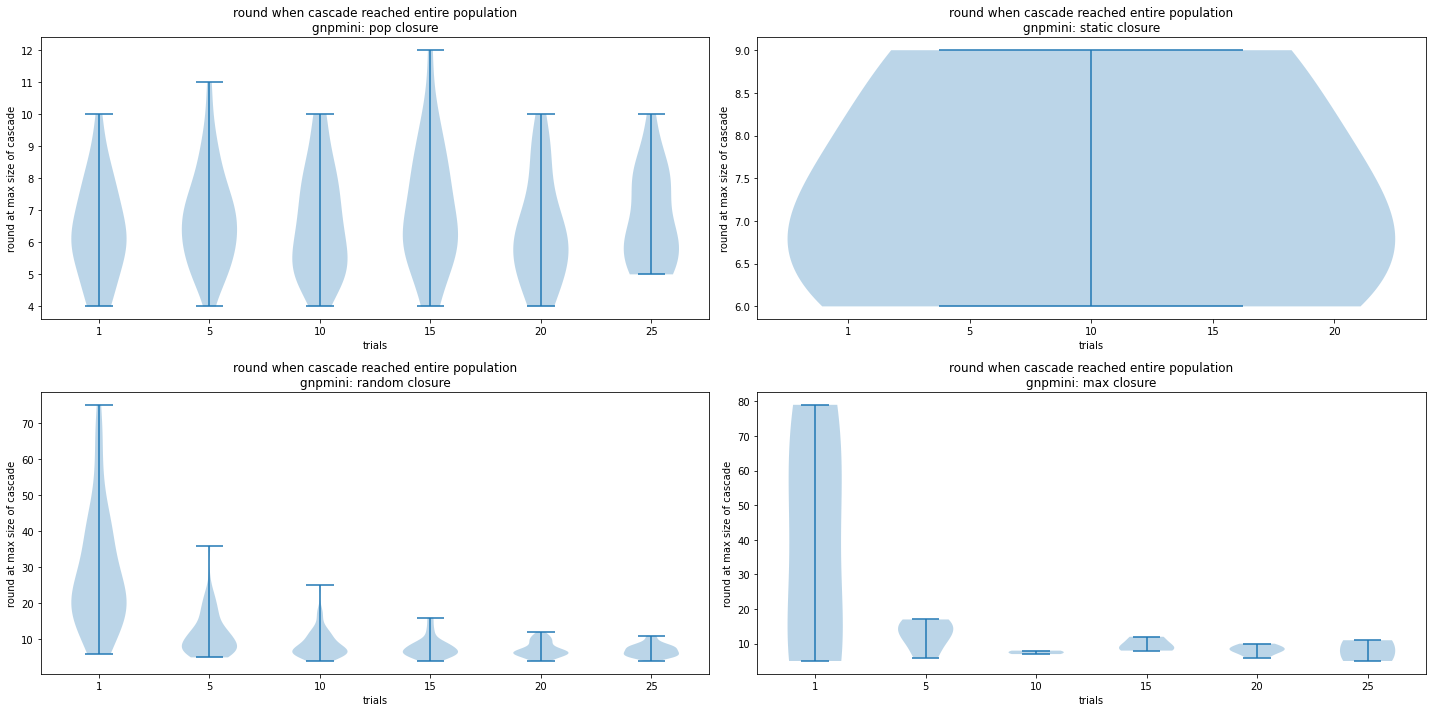

In [145]:
f, axs = plt.subplots(2, 2, figsize=(20, 10))
PLOT_TYPE= 'violin' # 'hist', 'violin', 'box'

for i, closure_method in enumerate(closure_methods):
    ax = axs[i//2, i%2]
    
    df = filter_df(all_data, {'graph_type': graph_type,
            'closure_method': closure_method, 
            'experiment_type': "closure"})
    
    if PLOT_TYPE != 'hist':
        all_round_when_complete = []
    for i, row in df.iterrows():
        round_when_complete = [max_size_round for (filled, max_size_round) in zip(row['rounds_filled'], row['max_size_rounds']) if filled]        
        if len(round_when_complete) == 0:
            continue
        assert len(round_when_complete) == np.sum(row['rounds_filled'])
        if PLOT_TYPE == 'hist':
            ax.hist(round_when_complete, label=row['values'], alpha=0.5);
        else:
            all_round_when_complete.append(round_when_complete)
    if PLOT_TYPE == 'violin':
        ax.violinplot(all_round_when_complete)
    elif PLOT_TYPE == 'box':
        ax.boxplot(all_round_when_complete)
        
    if PLOT_TYPE == 'hist':
        ax.legend(loc='upper right');
        ax.set_xlabel('round at max size of cascade');
        ax.set_ylabel('trials');

    elif PLOT_TYPE == 'violin':
        ax.set_xticklabels([''] + [str(x) for x in closure_vals]);
        ax.set_ylabel('round at max size of cascade');
        ax.set_xlabel('number of added edges per round');
    elif PLOT_TYPE == 'box':
        ax.set_xticklabels([str(x) for x in closure_vals]);
        ax.set_ylabel('round at max size of cascade');
        ax.set_xlabel('number of added edges per round');
        
    ax.set_ylabel('round at max size of cascade');
    ax.set_xlabel('trials');
    ax.set_title(f"round when cascade reached entire population\n{graph_type}: {closure_method} closure");
f.tight_layout();


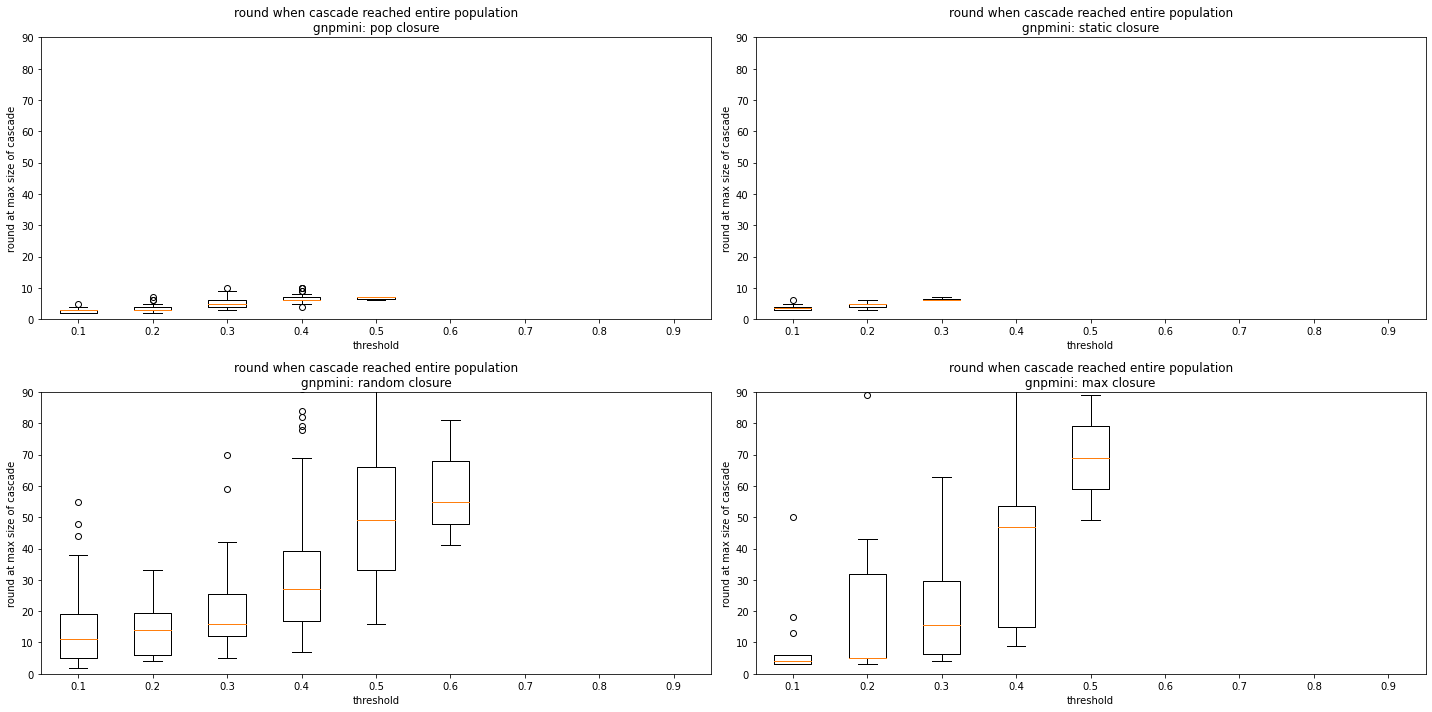

In [146]:
f, axs = plt.subplots(2, 2, figsize=(20, 10))
PLOT_TYPE= 'box' # 'hist', 'violin', 'box'
experiment_type = 'threshold'

for i, closure_method in enumerate(closure_methods):
    ax = axs[i//2, i%2]
    
    df = filter_df(all_data, {'graph_type': graph_type,
            'closure_method': closure_method, 
            'experiment_type': experiment_type })
    
    if PLOT_TYPE != 'hist':
        all_round_when_complete = []
    for i, row in df.iterrows():
        round_when_complete = [max_size_round for (filled, max_size_round) in zip(row['rounds_filled'], row['max_size_rounds']) if filled]        
        assert len(round_when_complete) == np.sum(row['rounds_filled'])
        if PLOT_TYPE == 'hist':
            ax.hist(round_when_complete, label="{:0.1f}".format(row['values']), alpha=0.5);
        else:
            all_round_when_complete.append(round_when_complete)
    if PLOT_TYPE == 'violin':
        ax.violinplot(all_round_when_complete)
    elif PLOT_TYPE == 'box':
        ax.boxplot(all_round_when_complete)
        
    if PLOT_TYPE == 'hist':
        ax.legend(loc='upper right');
        ax.set_xlabel('threshold');
        ax.set_ylabel('trials');
    elif PLOT_TYPE == 'violin':
        ax.set_xticklabels([''] + ["{:0.1f}".format(x) for x in experimet_vals_d[experiment_type]]);
        ax.set_ylabel('round at max size of cascade');
        ax.set_xlabel('threshold');
        ax.set_ylim([0, 90])
    elif PLOT_TYPE == 'box':
        ax.set_xticklabels(["{:0.1f}".format(x) for x in experiment_vals_d[experiment_type]]);
        ax.set_ylabel('round at max size of cascade');
        ax.set_xlabel('threshold');
        ax.set_ylim([0, 90])
        
    ax.set_title(f"round when cascade reached entire population\n{graph_type}: {closure_method} closure");
f.tight_layout();


In [147]:
def box_plot(ax, data, edge_color, label):
    bp = ax.boxplot(data, patch_artist=True, label=label)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    # for patch in bp['boxes']:
        # patch.set(facecolor=fill_color)       
        
    return bp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


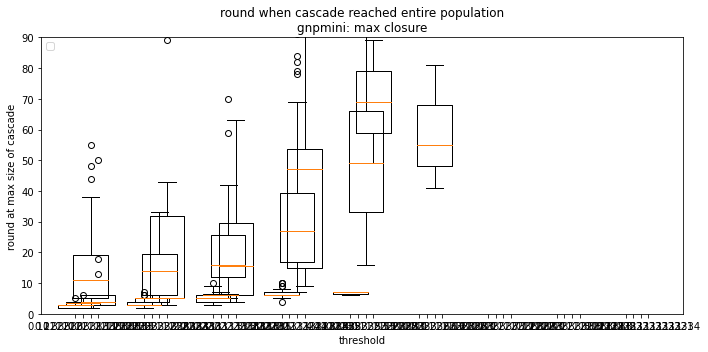

In [148]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
experiment_type = 'threshold'
experiment_vals = experiment_vals_d[experiment_type]
for i, closure_method in enumerate(closure_methods):
    
    df = filter_df(all_data, {'graph_type': graph_type,
            'closure_method': closure_method, 
            'experiment_type': experiment_type })
    
    all_round_when_complete = []
    for _, row in df.iterrows():
        round_when_complete = [max_size_round for (filled, max_size_round) in zip(row['rounds_filled'], row['max_size_rounds']) if filled]        
        assert len(round_when_complete) == np.sum(row['rounds_filled'])
        all_round_when_complete.append(round_when_complete)
    ax.boxplot(all_round_when_complete, positions=np.arange(0+i/len(experiment_vals), len(experiment_vals) + i/len(experiment_vals), 1))
    # box_plot(ax, all_round_when_complete, colors[i], closure_method)
        
ax.legend(loc='upper left');
# ax.set_xticklabels(["{:0.1f}".format(x) for x in experiment_vals_d[experiment_type]]);
ax.set_ylabel('round at max size of cascade');
ax.set_xlabel('threshold');
ax.set_ylim([0, 90])
        
ax.set_title(f"round when cascade reached entire population\n{graph_type}: {closure_method} closure");
f.tight_layout();


Plot difference to population

In [127]:
max_size_rounds_closure = {}
for i, row in df.iterrows():
    max_size_rounds_closure[row['closure_method']] = row['max_size_rounds']

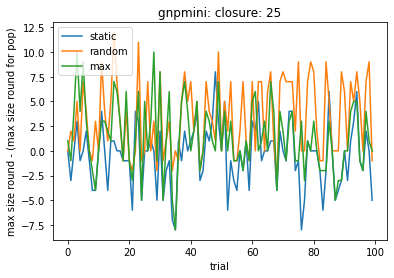

In [128]:
for k, v in max_size_rounds_closure.items():
    if k == 'pop': continue
    plt.plot(v - max_size_rounds_closure['pop'], label=k)
plt.legend(loc='upper left')
plt.xlabel('trial')
plt.ylabel('max size round - (max size round for pop)')
plt.title(f"{graph_type}: {experiment_type}: {experiment_val}");

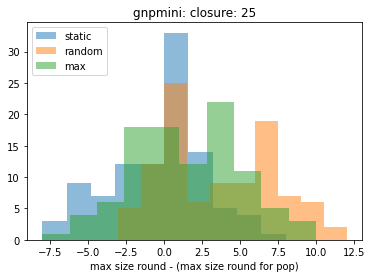

In [129]:
for k, v in max_size_rounds_closure.items():
    if k == 'pop': continue
    plt.hist(v - max_size_rounds_closure['pop'], label=k, alpha=0.5);
plt.legend(loc='upper left');
plt.xlabel('max size round - (max size round for pop)');
plt.title(f"{graph_type}: {experiment_type}: {experiment_val}");

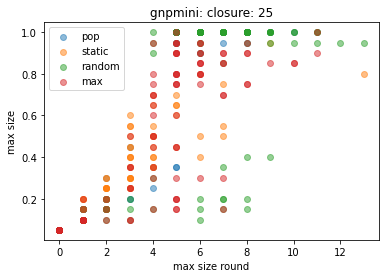

In [130]:
for i, row in df.iterrows():
    plt.scatter(row['max_size_rounds'], row['max_sizes'], label=row['closure_method'], alpha=0.5);
plt.xlabel('max size round');
plt.ylabel('max size');
plt.legend(loc='upper left');
plt.title(f"{graph_type}: {experiment_type}: {experiment_val}");

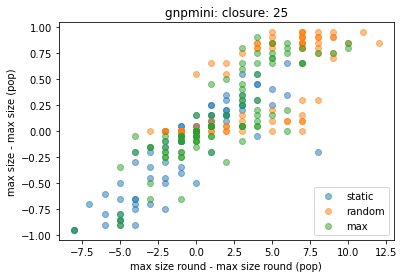

In [131]:
for i, row in df.iterrows():
    if row['closure_method'] != 'pop': continue
    pop_max_size_rounds = row['max_size_rounds']
    pop_max_sizes = row['max_sizes']
    
for i, row in df.iterrows():
    if row['closure_method'] == 'pop': continue
    plt.scatter(row['max_size_rounds'] - pop_max_size_rounds,
                row['max_sizes'] - pop_max_sizes,
                label=row['closure_method'], alpha=0.5);
plt.xlabel('max size round - max size round (pop)');
plt.ylabel('max size - max size (pop)');
plt.legend(loc='lower right');
plt.title(f"{graph_type}: {experiment_type}: {experiment_val}");

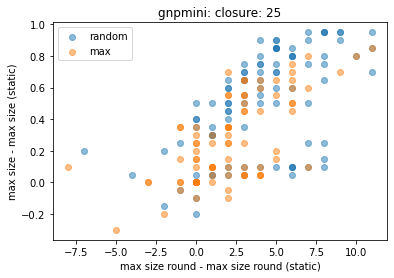

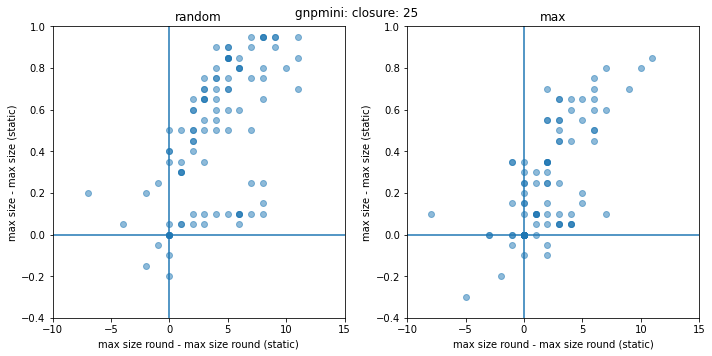

In [143]:
for i, row in df.iterrows():
    if row['closure_method'] != 'static': continue
    static_max_size_rounds = row['max_size_rounds']
    static_max_sizes = row['max_sizes']
    
for i, row in df.iterrows():
    if row['closure_method'] == 'pop': continue
    if row['closure_method'] == 'static': continue
    plt.scatter(row['max_size_rounds'] - static_max_size_rounds,
                row['max_sizes'] - static_max_sizes,
                label=row['closure_method'], alpha=0.5);
plt.xlabel('max size round - max size round (static)');
plt.ylabel('max size - max size (static)');
plt.legend(loc='upper left');
plt.title(f"{graph_type}: {experiment_type}: {experiment_val}");
plt.show();

f, axs = plt.subplots(1, 2, figsize=(10,5))
for _, row in filter_df(df, {'closure_method': 'random'}).iterrows():
    axs[0].scatter(row['max_size_rounds'] - static_max_size_rounds,
                   row['max_sizes'] - static_max_sizes,
                   label=row['closure_method'], alpha=0.5);
    axs[0].set_title('random')
for _, row in filter_df(df, {'closure_method': 'triadic'}).iterrows():
    axs[1].scatter(row['max_size_rounds'] - static_max_size_rounds,
                   row['max_sizes'] - static_max_sizes,
                   label=row['closure_method'], alpha=0.5);
    axs[1].set_title('triadic')
    
for ax in axs:
    ax.set_xlabel('max size round - max size round (static)');
    ax.set_ylabel('max size - max size (static)');
    ax.set_ylim([-0.4, 1]);
    ax.set_xlim([-10, 15]);
    ax.hlines(0, -10, 20);
    ax.vlines(0, -0.4, 1);
f.tight_layout();
plt.suptitle(f"{graph_type}: {experiment_type}: {experiment_val}");


## Plot gnp vs stochastic vs. population

e1_v2_hyperparam/gnp_modelpop_closure1.pkl
e1_v2_hyperparam/gnp_modelstatic_closure1.pkl
e1_v2_hyperparam/sbm_modelstatic_closure1.pkl


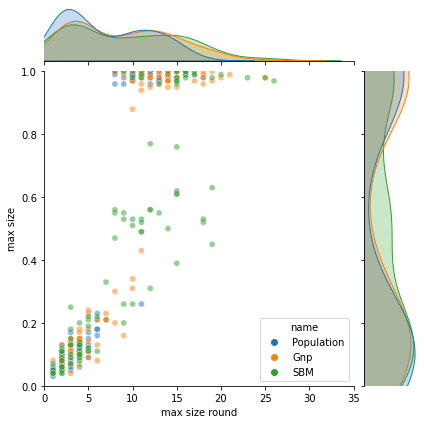

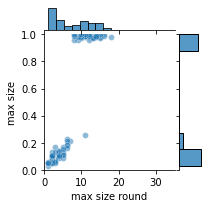

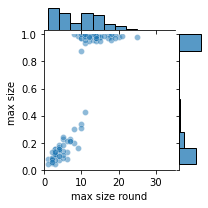

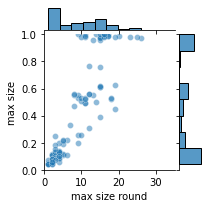

Get number of trials that were between 0.95 and 1.1
Population
43
Gnp
42
SBM
26


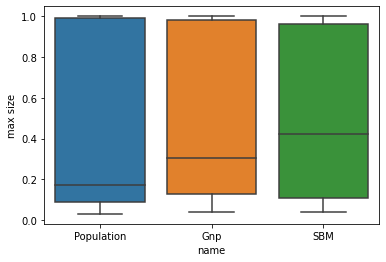

In [384]:
def plot_gnp_stochastic_pop():
    experiment_type = 'closure'
    experiment_val = 1

    graph_type_closure_methods = [('gnp', 'pop', 'Population'), ('gnp', 'static', 'Gnp'), ('sbm', 'static', 'SBM')]
    data = pd.DataFrame(columns=['max size round', 'rounds_filled', 'max size', 'name'])


    for graph_type, closure_method, name in graph_type_closure_methods:
        filename = get_filename(graph_type, closure_method, experiment_type, experiment_val)
        print(filename)
        (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
            open(filename, 'rb')
        )

        for max_size_round, rounds_filled, max_size in zip(np.array(max_size_round),
                                                           np.array(rounds_filled),
                                                           np.array([max(x) for x in sizes_round])):
            vals = {
                'max size round': max_size_round,
                'rounds_filled': rounds_filled,
                'max size': max_size,
                'name': name,
            } 
            data = data.append(vals, ignore_index=True)

    g = sns.jointplot(data=data, x="max size round", y="max size", hue='name',
                      xlim=(0, 35),
                      ylim=(0, 1), alpha=0.5,
                     );#, kind="hist");
    # g.legend(loc='lower right');

    # plt.title(f"{graph_type}: {experiment_type}: {experiment_val}");
    f = g.fig
    # f.xlabel('max size round');
    # f.ylabel('max size');
    f.savefig("fig/gnp-stochastic-population")

    for name in ['Population', 'Gnp', 'SBM']:
        df = filter_df(data, {'name': name})
        g = sns.jointplot(data=df, x="max size round", y="max size",
                          xlim=(0, 35),
                          ylim=(0, 1), 
                          height=3,
                          kind='scatter',alpha=0.5);

        # plt.title(f"{graph_type}: {experiment_type}: {experiment_val}");
        f = g.fig
        # f.xlabel('max size round');
        # f.ylabel('max size');
        f.savefig(f"fig/gnp-stochastic-population-{name}")


    plt.show()
    
    sns.boxplot(y=data['max size'], x=data['name'])


    print('Get number of trials that were between 0.95 and 1.1')
    def filter_arr(arr, minval, maxval):
        return [x for x in arr if x > minval and x < maxval]

    for name in ['Population', 'Gnp', 'SBM']:
        df = filter_df(data, {'name': name})
        print(name)
        print(len(filter_arr(df['max size'], 0.95, 1.1)))     
plot_gnp_stochastic_pop()

## Plot the difference between Gnp & SBM and the population

e1_v2_hyperparam/gnp_modelpop_closure1.pkl
e1_v2_hyperparam/gnp_modelstatic_closure1.pkl
e1_v2_hyperparam/sbm_modelstatic_closure1.pkl
Gnp
0
SBM
0


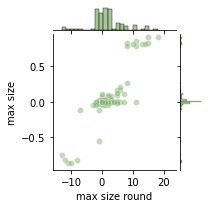

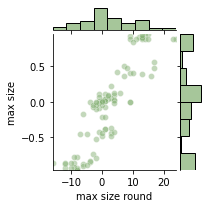

In [385]:
def plot_gnp_stochastic_pop_minus_pop():
    experiment_type = 'closure'
    experiment_val = 1

    graph_type_closure_methods = [('gnp', 'pop', 'Population'), ('gnp', 'static', 'Gnp'), ('sbm', 'static', 'SBM')]
    data_d = {}
    # = pd.DataFrame(columns=['max_size_rounds', 'rounds_filled', 'max_sizes', 'name'])


    for graph_type, closure_method, name in graph_type_closure_methods:
        filename = get_filename(graph_type, closure_method, experiment_type, experiment_val)
        print(filename)
        (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
            open(filename, 'rb')
        )

        vals = {
                'max_size_rounds': np.array(max_size_round),
                'rounds_filled': np.array(rounds_filled),
                'max_sizes': np.array([max(x) for x in sizes_round]),
            } 
        data_d[name] = vals


    # Subtract out pop
    for name, v in data_d.items():
        if name == "Population": continue
        data_d[name]['max_size_rounds'] = data_d[name]['max_size_rounds'] - data_d['Population']['max_size_rounds']
        data_d[name]['max_sizes'] = data_d[name]['max_sizes'] - data_d['Population']['max_sizes']    
    del (data_d['Population'])


    plot_individual_joints(data_d, ['Gnp', 'SBM'], 'fig/gnp-stochastic-population-{}-minus-pop', 
                           color=sns.xkcd_rgb['sage green'])
        
plot_gnp_stochastic_pop_minus_pop()

## Edge comparisons

In [388]:
def plot_individual_joints(data_d, selected_names, outname, 
                           color=None,
                          ):
    
    minx = min([min(v['max_size_rounds']) for k, v in data_d.items()])
    maxx = max([max(v['max_size_rounds']) for k, v in data_d.items()])
    miny = min([min(v['max_sizes']) for k, v in data_d.items()])
    maxy = max([max(v['max_sizes']) for k, v in data_d.items()])
    # Put in DF
    data = pd.DataFrame()

    for name, v in data_d.items():
        for max_size_round, rounds_filled, max_size in zip(v['max_size_rounds'],
                                                           v['rounds_filled'],
                                                           v['max_sizes'],
                                                          ):
            vals = {
                'max size round': max_size_round,
                'rounds_filled': rounds_filled,
                'max size': max_size,
                'name': name,
            } 
            data = data.append(vals, ignore_index=True)
            
    for name in selected_names:
        df = filter_df(data, {'name': name})
        print(name)
        print(len(filter_arr(df['max size'], 0.95, 1.1)))   

    for name in selected_names:
        df = filter_df(data, {'name': name})
        if color:
            g = sns.jointplot(data=df, x="max size round", y="max size",
                              xlim=(minx, maxx),
                              ylim=(miny, maxy),
                              color=color,
                              height=3,
                              kind='scatter',alpha=0.5);
        else:
            g = sns.jointplot(data=df, x="max size round", y="max size",
                              xlim=(minx, maxx),
                              ylim=(miny, maxy),
                              height=3,
                              kind='scatter',alpha=0.5);


        f = g.fig
        f.savefig(outname.format(name))
        plt.show()
    return data

In [389]:
experiment_type = 'closure'
experiment_val = 1

graph_type = 'gnp'

data_d = {}
selected_closure_methods = ['static', 'random', 'triadic']
# = pd.DataFrame(columns=['max_size_rounds', 'rounds_filled', 'max_sizes', 'name'])


for closure_method in selected_closure_methods:
    filename = get_filename(graph_type, closure_method, experiment_type, experiment_val)
    print(filename)
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(filename, 'rb')
    )
    vals = {
            'max_size_rounds': np.array(max_size_round),
            'rounds_filled': np.array(rounds_filled),
            'max_sizes': np.array([max(x) for x in sizes_round]),
        } 
    data_d[closure_method] = vals

e1_v2_hyperparam/gnp_modelstatic_closure1.pkl
e1_v2_hyperparam/gnp_modelrandom_closure1.pkl
e1_v2_hyperparam/gnp_modelmax_closure1.pkl


static
42
random
62
triadic
56


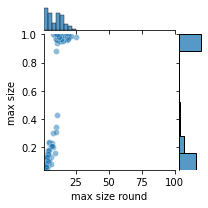

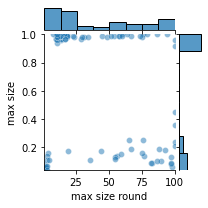

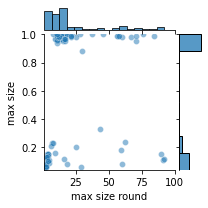

In [391]:
data = plot_individual_joints(data_d, selected_closure_methods, 'fig/edge-{}')

triadic
0


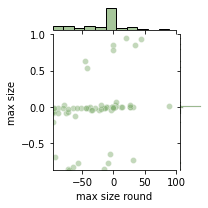

In [392]:
def plot_edge_minus_random(data_d):
    for name, v in data_d.items():
        if name == "random" or name == 'static': continue
        data_d[name]['max_size_rounds'] = data_d[name]['max_size_rounds'] - data_d['random']['max_size_rounds']
        data_d[name]['max_sizes'] = data_d[name]['max_sizes'] - data_d['random']['max_sizes']    
    # del (data_d['static'])
    plot_individual_joints(data_d, ['triadic'], 'fig/edge-minus-random-{}', color=sns.xkcd_rgb['sage green'])
plot_edge_minus_random(data_d)

random
0
triadic
0


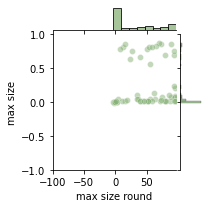

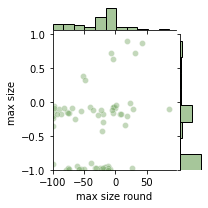

In [393]:
def plot_edge_minus_static(data_d):
    for name, v in data_d.items():
        if name == "static": continue
        data_d[name]['max_size_rounds'] = data_d[name]['max_size_rounds'] - data_d['static']['max_size_rounds']
        data_d[name]['max_sizes'] = data_d[name]['max_sizes'] - data_d['static']['max_sizes']    
    # del (data_d['static'])

    data = plot_individual_joints(data_d, ['random', 'triadic'], 'fig/edge-minus-static-{}', color=sns.xkcd_rgb['sage green'])

plot_edge_minus_static(data_d)

## Threshold

In [ ]:
experiment_type = 'threshold'
experiment_val = 1

graph_type = 'gnp'

data_d = {}
selected_closure_methods = ['static', 'random', 'triadic']
# = pd.DataFrame(columns=['max_size_rounds', 'rounds_filled', 'max_sizes', 'name'])


for closure_method in selected_closure_methods:
    filename = get_filename(graph_type, closure_method, experiment_type, experiment_val)
    print(filename)
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(filename, 'rb')
    )
    vals = {
            'max_size_rounds': np.array(max_size_round),
            'rounds_filled': np.array(rounds_filled),
            'max_sizes': np.array([max(x) for x in sizes_round]),
        } 
    data_d[closure_method] = vals

## Effect of closure params

In [ ]:
def plot_compare_vals_complete(graph_type, experiment_type, var_name, 
                               chosen_experiment_methods, experiment_vals,
                               plot_type, varname_to_plot):
    f, axs = plt.subplots(1, 3, figsize=(12, 3))

    maxy = 0
    miny = 100

    for i, experiment_method in enumerate(chosen_experiment_methods):
        # ax = axs[i//3, i%3]
        ax = axs[i]

        df = filter_df(all_data, {
            'graph_type': graph_type,
            'closure_method': experiment_method, 
            'experiment_type': experiment_type})
        if experiment_vals is None:
            experiment_vals = np.unique(df['values'])
            sorted(experiment_vals)
            print(experiment_vals)

        if plot_type != 'hist':
            all_round_when_complete = []
        for i, row in df.iterrows():
            if varname_to_plot == 'max_size_rounds':
                round_when_complete = [vars_to_plot for (filled, vars_to_plot) in zip(row['max_sizes'], row[varname_to_plot]) if np.max(filled) > 0.95]        
                if len(round_when_complete) == 0:
                    print('skipping')
                    continue
                # assert len(round_when_complete) == np.sum(row['rounds_filled'])
            elif varname_to_plot == 'max_sizes':
                round_when_complete = row[varname_to_plot]
            else:
                raise ValueError(f"cannot use {varname_to_plot}")
            if plot_type == 'hist':
                ax.hist(round_when_complete, label=row['values'], alpha=0.5);
            else:
                all_round_when_complete.append(round_when_complete)
        if plot_type == 'violin':
            ax.violinplot(all_round_when_complete)
        elif plot_type == 'box':
            ax.boxplot(all_round_when_complete)

        if len(all_round_when_complete) > 0:
            maxy = max(maxy, np.max(np.concatenate(all_round_when_complete)))
            miny = min(miny, np.min(np.concatenate(all_round_when_complete)))

        if plot_type == 'hist':
            ax.legend(loc='upper right');
            ax.set_xlabel(pretty_d[varname_to_plot]);
            ax.set_ylabel(var_name);

        else:
            if experiment_type == 'threshold':
                labels = ["{:.1f}".format(x) for x in experiment_vals]
            else:
                labels = [str(int(x)) for x in experiment_vals]
            ax.set_xticks([y + 1 for y in range(len(experiment_vals))],
                      labels=labels);
            ax.set_ylabel(pretty_d[varname_to_plot]);
            ax.set_xlabel(var_name);

        ax.set_title(pretty_d[experiment_method]);

    for i, experiment_method in enumerate(chosen_experiment_methods):
        ax = axs[i]
        ax.set_ylim((miny, maxy));
    f.tight_layout();
    plt.savefig(f"fig/var-{graph_type}-{varname_to_plot}-{experiment_type}");
    plt.show();

[  1.   5.  10.  25.  50.  75. 100. 250. 500.]


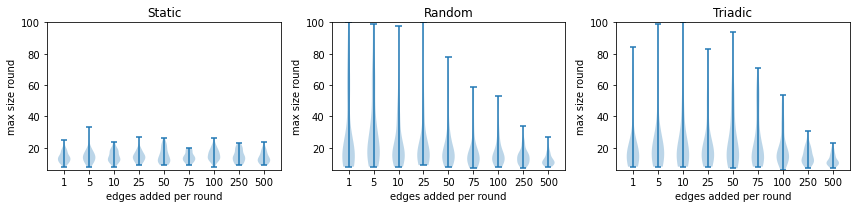

[  1.   5.  10.  25.  50.  75. 100. 250. 500.]


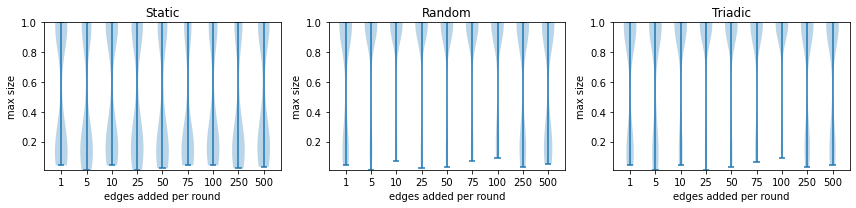

In [479]:
plot_type= 'violin' # 'hist', 'violin', 'box'
experiment_type = 'closure'
experiment_vals = None
var_name = "edges added per round"
title = ""
graph_type = 'gnp'
chosen_experiment_methods = ['static', 'random', 'triadic']
varname_to_plot = 'max_size_rounds'
plot_compare_vals_complete(graph_type, experiment_type, var_name, 
                           chosen_experiment_methods, experiment_vals,
                           plot_type, varname_to_plot)

varname_to_plot = 'max_sizes'
all_round_when_complete = plot_compare_vals_complete(graph_type, experiment_type, var_name, 
                           chosen_experiment_methods, experiment_vals,
                           plot_type, varname_to_plot)


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping


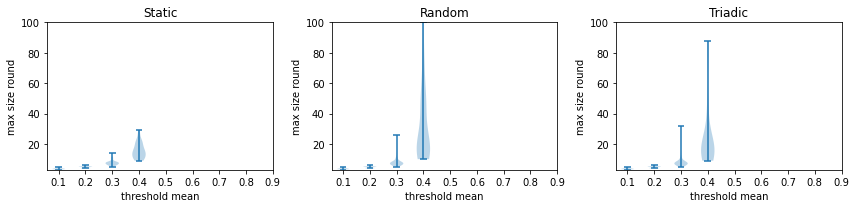

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


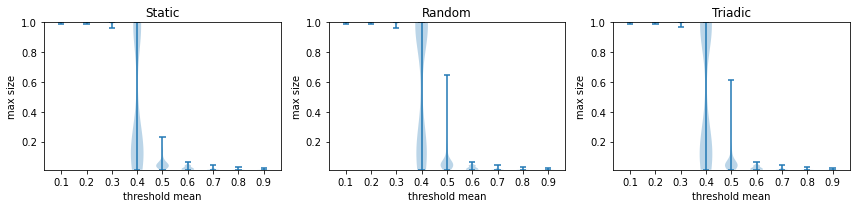

In [478]:
plot_type= 'violin' # 'hist', 'violin', 'box'
experiment_type = 'threshold'
experiment_vals = None
var_name = "threshold mean"
title = ""
graph_type = 'gnp'
chosen_experiment_methods = ['static', 'random', 'triadic']
varname_to_plot = 'max_size_rounds'
plot_compare_vals_complete(graph_type, experiment_type, var_name, 
                           chosen_experiment_methods, experiment_vals,
                           plot_type, varname_to_plot)

varname_to_plot = 'max_sizes'
all_round_when_complete = plot_compare_vals_complete(graph_type, experiment_type, var_name, 
                           chosen_experiment_methods, experiment_vals,
                           plot_type, varname_to_plot)